In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dqlab_telco.csv')

In [3]:
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7113, 22)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UpdatedAt,7113.0,202005.999016,0.031357,202005.0,202006.000,202006.00,202006.0,202006.0
SeniorCitizen,7113.0,0.161816,0.368308,0.0,0.000,0.00,0.0,1.0
tenure,7014.0,32.749358,25.206376,0.0,9.000,30.00,56.0,500.0
MonthlyCharges,7087.0,67.018985,117.396646,0.0,36.100,70.45,89.9,9000.0
TotalCharges,7098.0,2306.582650,2575.212013,19.0,402.925,1400.70,3801.6,80000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
UpdatedAt           7113 non-null int64
customerID          7113 non-null object
gender              7113 non-null object
SeniorCitizen       7113 non-null int64
Partner             7113 non-null object
Dependents          7113 non-null object
tenure              7014 non-null float64
PhoneService        7113 non-null object
MultipleLines       7113 non-null object
InternetService     7113 non-null object
OnlineSecurity      7113 non-null object
OnlineBackup        7113 non-null object
DeviceProtection    7113 non-null object
TechSupport         7113 non-null object
StreamingTV         7113 non-null object
StreamingMovies     7113 non-null object
Contract            7113 non-null object
PaperlessBilling    7113 non-null object
PaymentMethod       7113 non-null object
MonthlyCharges      7087 non-null float64
TotalCharges        7098 non-null float64
Churn               7070 non-nu

In [7]:
df.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

# Memfilter rows yang bermasalah

In [8]:
#Memfilter ID number customer yang tidak sesuai format
df['valid_id'] = df['customerID'].astype(str).str.match(r'(45\d{9,10})')
df = (df[df['valid_id'] == True]).drop('valid_id', axis=1)
print('Hasil jumlah ID Customer yang terfilter adalah', df['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


In [9]:
#Memfilter duplicated rows
df.drop_duplicates()
#Memfilter duplicated rows pada column customerID dan disorting berdasarkan UpdatedAt
df = df.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah', df['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


# Kesimpulan

Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 coloumns dengan 7017 jumlah ID yang Unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

# Handle Missing Values dengan Fillna

In [10]:
df['Churn'].isnull().sum()

43

In [11]:
#Remove rows jika ada missing values pada kolom Churn
print('Total missing values data dari kolom Churn', df['Churn'].isnull().sum())
df.dropna(subset=['Churn'], inplace=True)
print('Total rows dan kolom dataset setelah data Missing Values dihapus adalah',df.shape)

Total missing values data dari kolom Churn 43
Total rows dan kolom dataset setelah data Missing Values dihapus adalah (6950, 22)


In [12]:
#handling missing values Tenure fill with 11
df['tenure'].fillna(11, inplace=True)

#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df[col_name].median()
    df[col_name].fillna(median, inplace=True)

print(df.isnull().sum())

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Kesimpulan

Setelah kita analisis lebih lanjut, ternyata masih ada Missing Values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. 

# Mengatasi Outliers

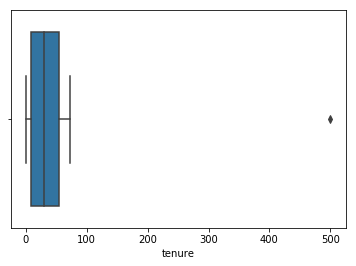

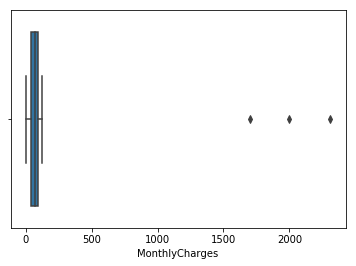

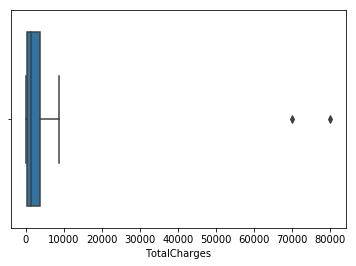

In [13]:
#Memvisualisasikan outliers bbrp vars
#Creating Box Plot

plt.figure()
sns.boxplot(x=df['tenure'])
plt.show()
plt.figure()
sns.boxplot(x=df['MonthlyCharges'])
plt.show()
plt.figure()
sns.boxplot(x=df['TotalCharges'])
plt.show()

In [14]:
#Mengatasi Outliers
Q1 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


# Kesimpulan
Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik titik yang berada jauh dari gambar boxplotnya. Kemudian kalo kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai Maximum & Minimum dari interquartile range (IQR). Setelah di tangani outliernya, dan dilihat perseberan data nya, terlihat sudah tidak ada lagi nilai yang outlier.

# Menstandarisasi Nilai

In [15]:
#Mendeteksi nilai yang tidak standar dengan memeriksa unique values pada setiap kolom
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

In [16]:
#Menstandarisasi nilai pada kolom yang terdapat nilai yang tidak standar
df = df.replace(['Wanita', 'Laki-Laki', 'Churn', 'Iya'], ['Female','Male','Yes','Yes'])

for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


# Kesimpulan
Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah :

- Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standarkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
- Dependents (Yes, No, Iya), yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
- Churn (Yes, No, Churn), yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.

Setelah kita standarkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value ny